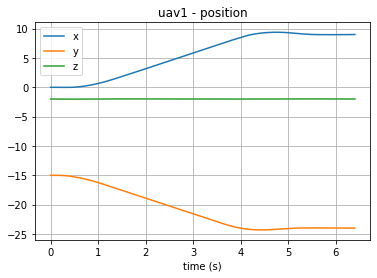

In [17]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
import numpy as np
from IPython.display import HTML, display

sys.path.insert(0, '../')
from flightgoggles.env import *

if __name__ == "__main__":
    env = flightgoggles_env(
        cfg_dir="../config",
        cfg_fgclient="FlightGogglesClient_testing.yaml",
        cfg_uav="multicopterDynamicsSim.yaml")

    start_pos = np.array([0, -15., -2.])
    env.set_state_vehicle(vehicle_id="uav1", 
                          position = start_pos,
                          attitude_euler_angle=np.array([0.,0.,-np.pi/2]))
    curr_pos = env.get_state("uav1")["position"]
    curr_att = env.get_state("uav1")["attitude_euler_angle"]
    curr_vel = env.get_state("uav1")["velocity"]
    
    target_pose = np.zeros(4)
    target_pose[:3] = curr_pos + np.array([9.0,-9.0,0.0])
    target_pose[3] = curr_att[2] + np.pi/2
    
    att_accumulator = np.array([curr_att[2]])
    while np.linalg.norm(curr_pos - target_pose[:3]) > 0.01 or np.sum(curr_vel**2) > 0.01:
        
        collided = env.proceed_waypoint(vehicle_id="uav1",
                                        # need to read up more on attitude and path finding to find better value
                                        # shuold add attitude to wayp_comm?
                                        waypoint_command=target_pose,
                                        duration=0.01)
        curr_pos = env.get_state("uav1")["position"]
        curr_vel = env.get_state("uav1")["velocity"]
        att_accumulator = np.append(att_accumulator, env.get_state("uav1")["attitude_euler_angle"][2])
        if collided:
            stop = True
            break
    
    env.plot_state(vehicle_id="uav1", attribute="position")
    env.save_logs(vehicle_id="uav1", save_dir="data/")

    ani_set = env.plot_state_video(flag_save=False, filename="uav", dpi=400)
    if "cam1" in ani_set.keys():
        display(HTML(ani_set["cam1"].to_html5_video()))
    env.close()

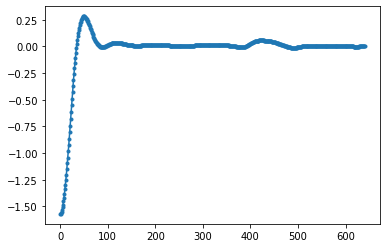

In [18]:
import matplotlib.pyplot as plt

x = np.arange(att_accumulator.size)
y = att_accumulator
plt.plot(x, y, marker='.')